In [26]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


In [27]:
# Read the csv into DataFrame
df = pd.read_csv("C:\\Users\\Simmy\\Desktop\\MY DS FOLDER\\houseprice.csv")

In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
df.shape

(1460, 81)

In [30]:
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [31]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
# Find columns with missing values and their percent missing
df.isnull().sum().any()

True

In [42]:
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

#Add a new column to the and dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f})'.format(float(x)/df.shape[0]*100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
PoolQC,1453,99.52)
MiscFeature,1406,96.30)
Alley,1369,93.77)
Fence,1179,80.75)
FireplaceQu,690,47.26)
LotFrontage,259,17.74)
GarageYrBlt,81,5.55)
GarageCond,81,5.55)
GarageType,81,5.55)
GarageFinish,81,5.55)


In [45]:
# Drop columns with high missing values because higher missing value cols will be useless
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1)

In [46]:
# Drop rows with any missing values
df.dropna(inplace=True)

In [47]:
df.shape

(1094, 76)

C:\Users\Simmy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

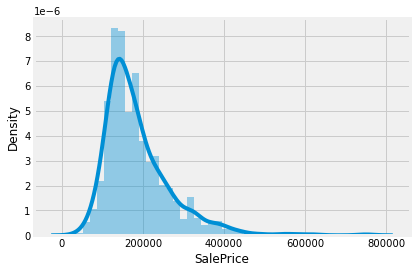

In [48]:
sns.distplot(df.SalePrice)

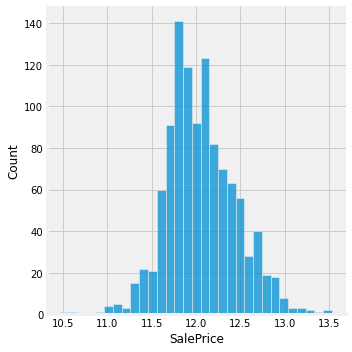

In [49]:
sns.displot(np.log(df.SalePrice))

In [50]:
df['LogOfPrice'] = np.log(df.SalePrice)
df.drop(["SalePrice"], axis=1, inplace=True)

In [51]:
df.skew().sort_values(ascending=False)

LotArea          15.508309
PoolArea         13.614615
3SsnPorch        11.069793
LowQualFinSF      9.896145
MiscVal           9.673292
KitchenAbvGr      5.587741
BsmtFinSF2        4.372440
BsmtHalfBath      4.049639
ScreenPorch       3.962075
EnclosedPorch     3.165433
MasVnrArea        2.695262
OpenPorchSF       2.382985
TotalBsmtSF       2.314581
LotFrontage       2.227272
BsmtFinSF1        1.931425
GrLivArea         1.553875
WoodDeckSF        1.525006
MSSubClass        1.428836
1stFlrSF          1.371529
BsmtUnfSF         0.884701
OverallCond       0.862376
2ndFlrSF          0.790156
GarageArea        0.726787
TotRmsAbvGrd      0.721070
Fireplaces        0.629886
HalfBath          0.607079
BsmtFullBath      0.532962
LogOfPrice        0.304486
OverallQual       0.298295
GarageCars        0.210251
MoSold            0.168709
YrSold            0.122460
Id                0.020785
FullBath          0.019856
BedroomAbvGr      0.016689
YearRemodAdd     -0.585271
YearBuilt        -0.633765
G

In [54]:
# set the target and predictors
y = df.LogOfPrice #target

# use only those input features with numeric data type
df_temp = df.select_dtypes(include=["int64","float64"]) # Target variable which z price..

X = df_temp.drop(["LogOfPrice"], axis=1) # predictors(other variables as features)

In [55]:
# split the dataset into train  and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)

In [58]:
lr = LinearRegression()

# fit optimal linear line  on training data , this performs gradient descent under the hood
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
yr_pred = lr.predict(X_test)

In [63]:
# evaluate the algorithm with a test set
lr_score = lr.score(X_test, y_test) #train test
print("Accuracy: ", lr_score)

Accuracy:  0.8866637114738787


In [64]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying

lr_cv = cross_val_score(lr, X, y, cv= 5, scoring = 'r2')
print("R2: ", lr_cv.mean())

R2:  0.8178526186867077
